# Housing Prices Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('darkgrid')

In [2]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    It uses Locally Weighted Scatterplot Smoothing (LOWESS) to fit a model. 
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    pred = model.fittedvalues
    influence = model.get_influence()
    resid_std = influence.resid_studentized_internal
    
    fig, ax = plt.subplots(1,2, figsize=(7.5,3.5))
    
    sns.regplot(x=pred, y=y, lowess=True, ax=ax[0], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=yhat) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[min(pred), max(pred)], 
                 ax=ax[0], color='red', ls=':')
    ax[0].set_title('Observed vs. Predicted Values')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Observed')
    
    sns.regplot(x=pred, y=resid_std, lowess=True, ax=ax[1], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=0) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0,0], ax=ax[1], color='red', ls=':')
    ax[1].set_title('Residuals vs. Predicted Values')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Standardized Residual')
    
    return fig, ax

In [3]:
 from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()

In [8]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
X = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [13]:
y = pd.DataFrame(data=housing.target, columns=housing.target_names)

In [14]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


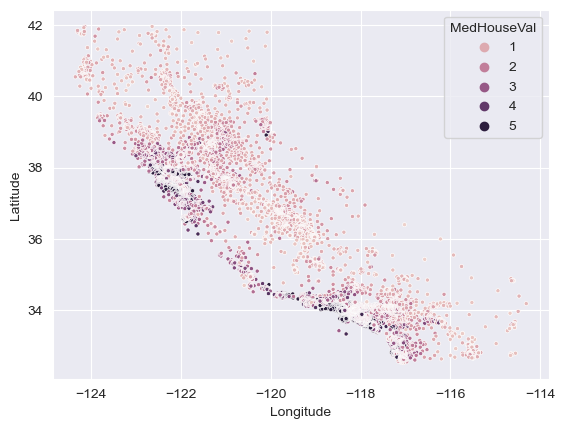

In [17]:
fig, ax = plt.subplots()
sns.scatterplot(data=X, x='Longitude', y='Latitude', ax=ax, marker='.', hue=y['MedHouseVal'])
plt.show()

In [18]:
X = X.drop(['Latitude','Longitude'], axis=1)

In [19]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [21]:
# train, validation, test splits
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, random_state=42)

In [23]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=101)

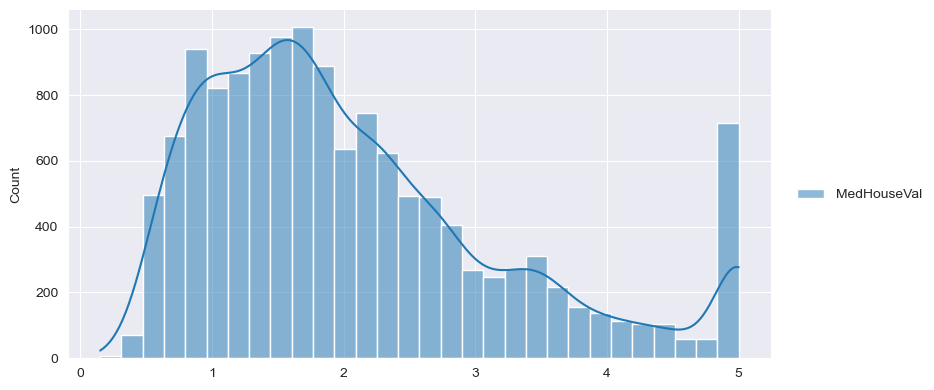

In [25]:
sns.displot(data=y_train, kde=True, bins=30, height=4, aspect=2)
plt.show()

In [26]:
formula = 'MedHouseVal ~ MedInc * HouseAge * AveRooms * AveBedrms * Population * AveOccup + I(MedInc**2) + I(HouseAge**2) + I(AveRooms**2) + I(AveBedrms**2) + I(Population**2) + I(AveOccup**2)'
calimodel = smf.ols(formula,X_train.join(y_train)).fit()
calimodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Ordinary least squares
=======================================================================================================
Model:                          OLS                          Adj. R-squared:                 0.635     
Dependent Variable:             MedHouseVal                  AIC:                            29333.9778
Date:                           2023-08-14 21:36             BIC:                            29861.3893
No. Observations:               13828                        Log-Likelihood:                 -14597.   
Df Model:                       69                           F-statistic:                    349.5     
Df Residuals:                   13758                        Prob (F-statistic):             0.00      
R-squared:                      0.637                        Scale:                          0.48598   
-------------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------------------------
Intercept                                               0.4063   0.6859   0.5923 0.5536 -0.9382  1.7507
MedInc                                                  0.4581   0.1853   2.4728 0.0134  0.0950  0.8212
HouseAge                                                0.0019   0.0275   0.0677 0.9460 -0.0521  0.0558
MedInc:HouseAge                                         0.0090   0.0070   1.2778 0.2013 -0.0048  0.0227
AveRooms                                               -0.7797   0.1052  -7.4106 0.0000 -0.9859 -0.5735
MedInc:AveRooms                                         0.1832   0.0263   6.9722 0.0000  0.1317  0.2347
HouseAge:AveRooms                                       0.0088   0.0034   2.6281 0.0086  0.0022  0.0154
MedInc:HouseAge:AveRooms                               -0.0043   0.0008  -5.6527 0.0000 -0.0058 -0.0028
AveBedrms                                               3.0608   0.5389   5.6794 0.0000  2.0044  4.1171
MedInc:AveBedrms                                       -0.5167   0.1525  -3.3885 0.0007 -0.8156 -0.2178
HouseAge:AveBedrms                                     -0.0525   0.0254  -2.0684 0.0386 -0.1022 -0.0027
MedInc:HouseAge:AveBedrms                               0.0168   0.0062   2.6881 0.0072  0.0045  0.0290
AveRooms:AveBedrms                                     -0.0255   0.0380  -0.6717 0.5018 -0.0999  0.0489
MedInc:AveRooms:AveBedrms                              -0.0171   0.0108  -1.5859 0.1128 -0.0381  0.0040
HouseAge:AveRooms:AveBedrms                             0.0012   0.0015   0.7829 0.4337 -0.0018  0.0042
MedInc:HouseAge:AveRooms:AveBedrms                      0.0001   0.0004   0.2564 0.7976 -0.0008  0.0010
Population                                              0.0020   0.0010   1.9575 0.0503 -0.0000  0.0040
MedInc:Population                                      -0.0010   0.0002  -4.1436 0.0000 -0.0015 -0.0005
HouseAge:Population                                    -0.0000   0.0000  -0.3986 0.6902 -0.0001  0.0001
MedInc:HouseAge:Population                              0.0000   0.0000   0.8473 0.3968 -0.0000  0.0000
AveRooms:Population                                     0.0001   0.0002   0.8588 0.3904 -0.0002  0.0005
MedInc:AveRooms:Population                             -0.0000   0.0000  -0.1128 0.9102 -0.0001  0.0001
HouseAge:AveRooms:Population                           -0.0000   0.0000  -1.6619 0.0965 -0.0000  0.0000
MedInc:HouseAge:AveRooms:Population                     0.0000   0.0000   0.5605 0.5752 -0.0000  0.0000
AveBedrms:Population                                   -0.0021   0.0010  -2.1074 0.0351 -0.0040 -0.0001
MedInc:AveBedrms:Population                             0.0013   0.0003   4.8620 0.0000  0.0008  0.0018
HouseAge:AveBedrms:Population      

In [27]:
resid = calimodel.resid
pred = calimodel.fittedvalues

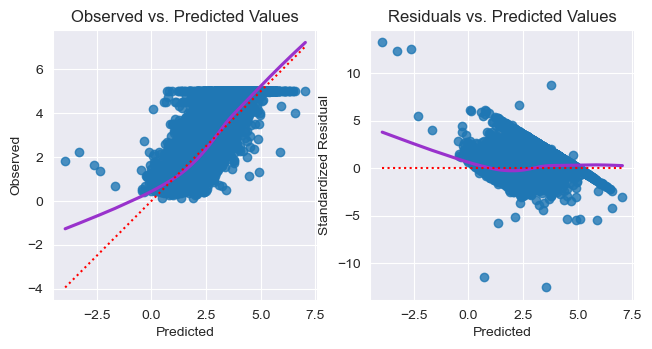

In [28]:
fig, ax = linearity_test(calimodel, y_train)


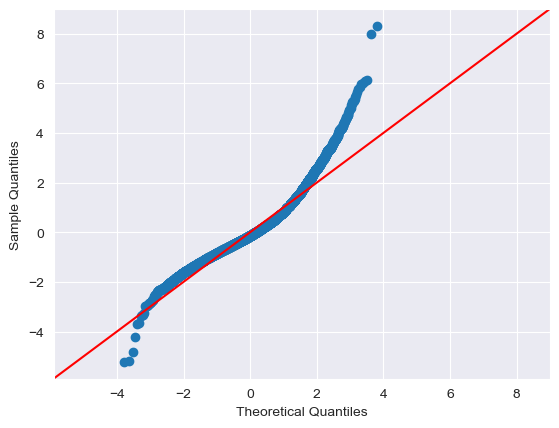

In [29]:
fig, ax = plt.subplots()
smg.qqplot(resid, fit=True, line='45', ax=ax)
plt.show()

In [30]:
stats.normaltest(resid)

NormaltestResult(statistic=3092.03820824052, pvalue=0.0)

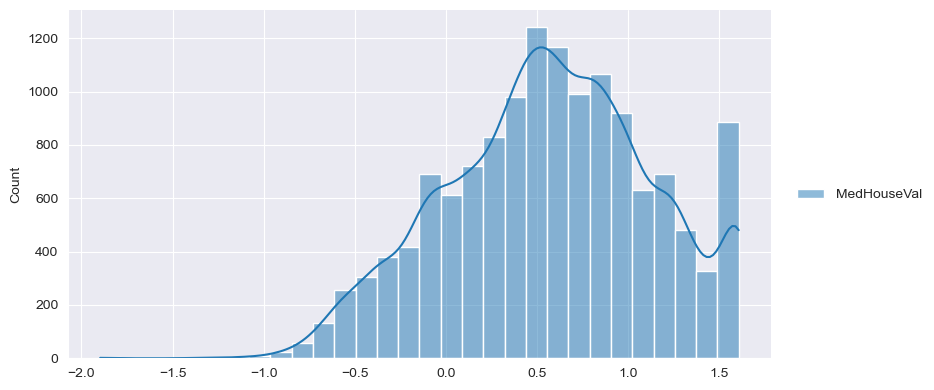

In [32]:
sns.displot(data=y_train.apply(np.log), kde=True, bins=30, height=4, aspect=2)

In [33]:
formula = 'I(np.log(MedHouseVal)) ~ MedInc * HouseAge * AveRooms * AveBedrms * Population * AveOccup + I(MedInc**2) + I(HouseAge**2) + I(AveRooms**2) + I(AveBedrms**2) + I(Population**2) + I(AveOccup**2)'

In [34]:
calimodel = smf.ols(formula, X_train.join(y_train)).fit()
calimodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Ordinary least squares
=======================================================================================================
Model:                        OLS                              Adj. R-squared:               0.624     
Dependent Variable:           I(np.log(MedHouseVal))           AIC:                          10107.3457
Date:                         2023-08-14 21:55                 BIC:                          10634.7573
No. Observations:             13828                            Log-Likelihood:               -4983.7   
Df Model:                     69                               F-statistic:                  333.9     
Df Residuals:                 13758                            Prob (F-statistic):           0.00      
R-squared:                    0.626                            Scale:                        0.12100   
-------------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------------------------
Intercept                                              -0.9507   0.3422  -2.7778 0.0055 -1.6215 -0.2799
MedInc                                                  0.4737   0.0924   5.1241 0.0000  0.2925  0.6549
HouseAge                                                0.0422   0.0137   3.0729 0.0021  0.0153  0.0691
MedInc:HouseAge                                        -0.0071   0.0035  -2.0207 0.0433 -0.0139 -0.0002
AveRooms                                               -0.1875   0.0525  -3.5712 0.0004 -0.2904 -0.0846
MedInc:AveRooms                                         0.0473   0.0131   3.6118 0.0003  0.0217  0.0730
HouseAge:AveRooms                                      -0.0026   0.0017  -1.5795 0.1142 -0.0059  0.0006
MedInc:HouseAge:AveRooms                               -0.0004   0.0004  -0.9783 0.3279 -0.0011  0.0004
AveBedrms                                               1.4861   0.2689   5.5264 0.0000  0.9590  2.0132
MedInc:AveBedrms                                       -0.2929   0.0761  -3.8492 0.0001 -0.4420 -0.1437
HouseAge:AveBedrms                                     -0.0453   0.0127  -3.5786 0.0003 -0.0701 -0.0205
MedInc:HouseAge:AveBedrms                               0.0140   0.0031   4.4853 0.0000  0.0079  0.0201
AveRooms:AveBedrms                                     -0.0606   0.0189  -3.1957 0.0014 -0.0977 -0.0234
MedInc:AveRooms:AveBedrms                               0.0038   0.0054   0.7019 0.4828 -0.0068  0.0143
HouseAge:AveRooms:AveBedrms                             0.0028   0.0008   3.6622 0.0003  0.0013  0.0043
MedInc:HouseAge:AveRooms:AveBedrms                     -0.0006   0.0002  -2.6881 0.0072 -0.0010 -0.0002
Population                                              0.0001   0.0005   0.1142 0.9091 -0.0009  0.0011
MedInc:Population                                      -0.0002   0.0001  -1.6655 0.0958 -0.0005  0.0000
HouseAge:Population                                     0.0000   0.0000   0.8117 0.4170 -0.0000  0.0001
MedInc:HouseAge:Population                              0.0000   0.0000   0.0161 0.9872 -0.0000  0.0000
AveRooms:Population                                     0.0001   0.0001   1.1485 0.2508 -0.0001  0.0003
MedInc:AveRooms:Population                             -0.0000   0.0000  -0.6880 0.4915 -0.0000  0.0000
HouseAge:AveRooms:Population                           -0.0000   0.0000  -1.3488 0.1774 -0.0000  0.0000
MedInc:HouseAge:AveRooms:Population                    -0.0000   0.0000  -0.1132 0.9099 -0.0000  0.0000
AveBedrms:Population                                   -0.0001   0.0005  -0.1576 0.8748 -0.0010  0.0009
MedInc:AveBedrms:Population                             0.0003   0.0001   2.3396 0.0193  0.0000  0.0006
HouseAge:AveBedrms:Population      

(<Figure size 750x350 with 2 Axes>,
 array([<Axes: title={'center': 'Observed vs. Predicted Values'}, xlabel='Predicted', ylabel='Observed'>,
        <Axes: title={'center': 'Residuals vs. Predicted Values'}, xlabel='Predicted', ylabel='Standardized Residual'>],
       dtype=object))

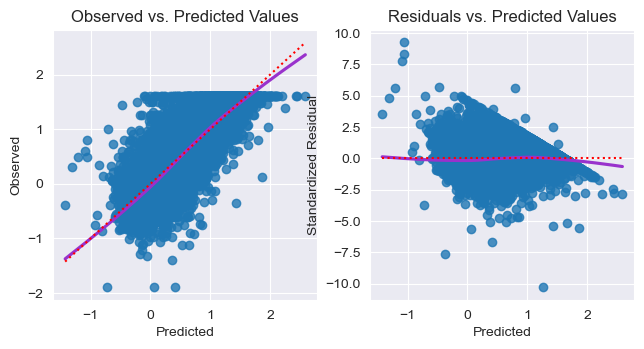

In [35]:
linearity_test(calimodel, y_train.apply(np.log))

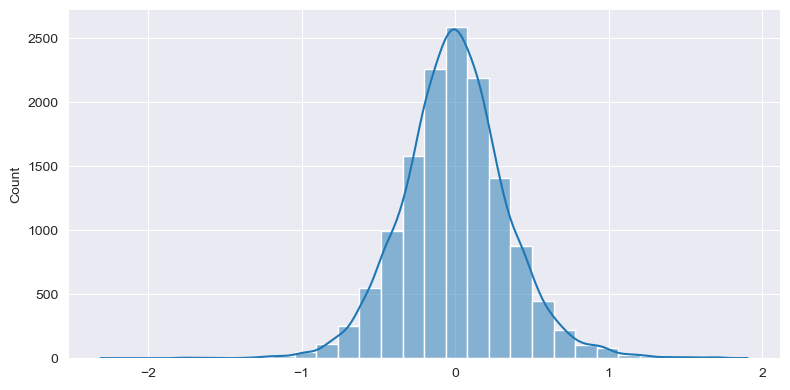

In [36]:
sns.displot(data=calimodel.resid, kde=True, bins=30, height=4, aspect=2)
plt.show()

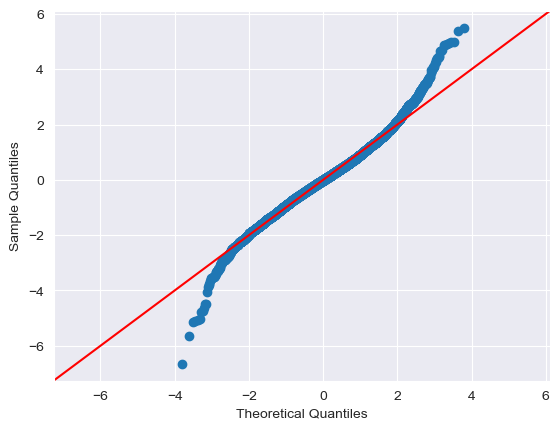

In [37]:
fig, ax = plt.subplots()
smg.qqplot(calimodel.resid, fit=True, line='45', ax=ax)
plt.show()

In [38]:
stats.normaltest(calimodel.resid)

NormaltestResult(statistic=576.9792028378353, pvalue=5.1352077403785006e-126)

## Model Selection

In [39]:
from sklearn.linear_model import Lasso

In [40]:
def poly2(X):
    '''
    Function for adding all second order terms from an X matrix of quantitative factors.
    It creates squared and two-way interaction columns and standardizes them.
    It returns the modified X matrix.
    
    Args:
    * X - the original X matrix

    Returns:
    * A standardized polynomial X matrix with column names matching Patsy formulation
      ensuring that lower-level factors are also included.
    '''
    import scipy.stats as stats
    X_poly = stats.zscore(X.copy())
    for ii in range(len(X.columns)):
        col1 = X.columns[ii]
        X_poly['I(' + col1 + '**2)'] = X_poly[col1] ** 2
        for jj in range(ii+1,len(X.columns)):
            col2 = X.columns[jj]
            X_poly[col1 + '*' + col2] = X_poly[col1] * X_poly[col2]
    return X_poly

In [41]:
def poly3(X):
    '''
    Function for adding all second order terms plus three-way interactions from an X matrix of quantitative factors.
    It creates squared and two/three-way interaction columns and standardizes them.
    It returns the modified X matrix.
    
    Args:
    * X - the original X matrix

    Returns:
    * A standardized polynomial X matrix with column names matching Patsy formulation
      ensuring that lower-level factors are also included.
    '''
    import scipy.stats as stats
    X_poly = stats.zscore(X.copy())
    for ii in range(len(X.columns)):
        col1 = X.columns[ii]
        X_poly['I(' + col1 + '**2)'] = X_poly[col1] ** 2
        for jj in range(ii+1,len(X.columns)):
            col2 = X.columns[jj]
            X_poly[col1 + '*' + col2] = X_poly[col1] * X_poly[col2]
            for kk in range(jj+1, len(X.columns)):
                col3 = X.columns[kk]
                X_poly[col1 + '*' + col2 + '*' + col3] = X_poly[col1]*X_poly[col2]*X_poly[col3]
    return X_poly

In [42]:
X_poly = poly3(X_train)

In [43]:
X_poly.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,I(MedInc**2),MedInc*HouseAge,MedInc*HouseAge*AveRooms,MedInc*HouseAge*AveBedrms,...,AveRooms*Population,AveRooms*Population*AveOccup,AveRooms*AveOccup,I(AveBedrms**2),AveBedrms*Population,AveBedrms*Population*AveOccup,AveBedrms*AveOccup,I(Population**2),Population*AveOccup,I(AveOccup**2)
5088,-1.521700,-0.758685,-0.918131,0.072769,-0.614962,-0.040150,2.315569,1.154490,-1.059973,0.084011,...,0.564615,-0.022669,0.036863,0.005295,-0.044750,0.001797,-0.002922,0.378178,0.024691,0.001612
17096,0.182054,0.352399,0.307485,-0.024416,-0.362823,-0.059436,0.033144,0.064156,0.019727,-0.001566,...,-0.111562,0.006631,-0.018276,0.000596,0.008859,-0.000527,0.001451,0.131641,0.021565,0.003533
5617,-0.172328,1.066667,-0.251078,-0.004705,-0.337522,0.095154,0.029697,-0.183816,0.046152,0.000865,...,0.084744,0.008064,-0.023891,0.000022,0.001588,0.000151,-0.000448,0.113921,-0.032117,0.009054
20060,-1.171732,-0.361869,-0.474558,-0.110273,0.222592,0.110994,1.372956,0.424013,-0.201219,-0.046757,...,-0.105633,-0.011725,-0.052673,0.012160,-0.024546,-0.002724,-0.012240,0.049547,0.024706,0.012320
895,0.059986,-1.155500,-0.338151,-0.018360,1.140412,-0.051997,0.003598,-0.069313,0.023438,0.001273,...,-0.385631,0.020052,0.017583,0.000337,-0.020938,0.001089,0.000955,1.300539,-0.059298,0.002704


In [44]:
coefs = pd.DataFrame(columns=X_poly.columns)
for alpha in np.arange(0.001, 0.1, 0.001):
    lm = Lasso(alpha=alpha, max_iter=100000)
    lm.fit(X_poly, y_train.apply(np.log))
    coefs.loc[alpha] = lm.coef_

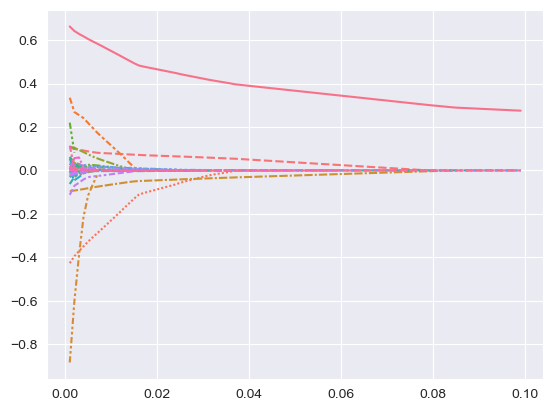

In [45]:
fig, ax = plt.subplots()
sns.lineplot(data=coefs[coefs != 0], ax=ax, legend=False)
plt.show()

In [46]:
ii = 24
coefs.iloc[ii][coefs.iloc[ii] != 0]

MedInc                           0.443961
HouseAge                         0.064223
AveRooms                        -0.056741
I(MedInc**2)                    -0.041232
I(HouseAge**2)                   0.001690
HouseAge*AveRooms*AveBedrms     -0.001194
I(AveRooms**2)                   0.003428
AveRooms*AveBedrms*Population    0.000479
I(AveBedrms**2)                 -0.000879
I(Population**2)                 0.000004
I(AveOccup**2)                  -0.000160
Name: 0.025, dtype: float64

In [47]:
def form(ii):
    formula = 'I(np.log(MedHouseVal)) ~ '
    for term in coefs.iloc[ii][coefs.iloc[ii] != 0].index:
        formula += term + ' + '
    return formula[:-3]

In [48]:
formula = form(ii)
formula

'I(np.log(MedHouseVal)) ~ MedInc + HouseAge + AveRooms + I(MedInc**2) + I(HouseAge**2) + HouseAge*AveRooms*AveBedrms + I(AveRooms**2) + AveRooms*AveBedrms*Population + I(AveBedrms**2) + I(Population**2) + I(AveOccup**2)'

In [49]:
Xy_train = X_train.join(y_train)

In [51]:
best_ii = 0
best_bic = 999999999
for ii in range(len(coefs)):
    formula = form(ii)
    model = smf.ols(formula, data=Xy_train).fit()
    if model.bic <= best_bic:
        best_ii = ii
        best_bic = model.bic

In [52]:
print(best_ii, best_bic)

0 10674.314198034102


In [53]:
model = smf.ols(form(best_ii), Xy_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                 OLS                     Adj. R-squared:      0.617     
Dependent Variable:    I(np.log(MedHouseVal))  AIC:                 10357.8673
Date:                  2023-08-14 23:04        BIC:                 10674.3142
No. Observations:      13828                   Log-Likelihood:      -5136.9   
Df Model:              41                      F-statistic:         543.3     
Df Residuals:          13786                   Prob (F-statistic):  0.00      
R-squared:             0.618                   Scale:               0.12346   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -0.5532   0.1277  -4.3307 0.0000 -0.8036 -0.3028
MedInc                         0.5225   0.0284  18.4018 0.0000  0.4669  0.5782
HouseAge                      -0.0019   0.0038  -0.4891 0.6248 -0.0093  0.0056
AveRooms                      -0.2240   0.0233  -9.6096 0.0000 -0.2697 -0.1783
AveBedrms                      0.9982   0.1216   8.2110 0.0000  0.7599  1.2364
Population                     0.0001   0.0001   1.2795 0.2007 -0.0001  0.0003
AveOccup                      -0.0349   0.0306  -1.1406 0.2541 -0.0949  0.0251
I(MedInc ** 2)                -0.0264   0.0008 -33.6664 0.0000 -0.0279 -0.0248
MedInc:HouseAge               -0.0001   0.0007  -0.1386 0.8898 -0.0015  0.0013
MedInc:AveRooms                0.0226   0.0041   5.5623 0.0000  0.0147  0.0306
HouseAge:AveRooms              0.0018   0.0005   3.6811 0.0002  0.0009  0.0028
MedInc:HouseAge:AveRooms      -0.0006   0.0001  -8.0684 0.0000 -0.0007 -0.0005
MedInc:AveBedrms              -0.1713   0.0203  -8.4410 0.0000 -0.2111 -0.1315
HouseAge:AveBedrms            -0.0088   0.0035  -2.5620 0.0104 -0.0156 -0.0021
MedInc:HouseAge:AveBedrms      0.0041   0.0007   6.0464 0.0000  0.0028  0.0054
MedInc:Population             -0.0001   0.0000  -3.2942 0.0010 -0.0001 -0.0000
HouseAge:Population           -0.0000   0.0000  -3.0464 0.0023 -0.0000 -0.0000
MedInc:HouseAge:Population     0.0000   0.0000   7.7489 0.0000  0.0000  0.0000
AveRooms:AveBedrms            -0.0290   0.0107  -2.7018 0.0069 -0.0501 -0.0080
MedInc:AveRooms:AveBedrms     -0.0011   0.0003  -3.2400 0.0012 -0.0017 -0.0004
AveRooms:Population           -0.0000   0.0000  -0.5997 0.5487 -0.0000  0.0000
MedInc:AveRooms:Population    -0.0000   0.0000  -0.7213 0.4707 -0.0000  0.0000
MedInc:AveOccup               -0.0292   0.0058  -5.0547 0.0000 -0.0406 -0.0179
AveRooms:AveOccup             -0.0153   0.0044  -3.4569 0.0005 -0.0240 -0.0066
MedInc:AveRooms:AveOccup       0.0061   0.0008   7.6619 0.0000  0.0046  0.0077
AveBedrms:Population          -0.0002   0.0001  -1.9647 0.0495 -0.0003 -0.0000
MedInc:AveBedrms:Population    0.0001   0.0000   4.4086 0.0000  0.0000  0.0001
Population:AveOccup            0.0000   0.0000   7.4864 0.0000  0.0000  0.0001
MedInc:Population:AveOccup    -0.0000   0.0000  -5.4321 0.0000 -0.0000 -0.0000
I(HouseAge ** 2)               0.0001   0.0000   5.4030 0.0000  0.0001  0.0001
HouseAge:AveRooms:AveBedrms   -0.0002   0.0001  -3.8118 0.0001 -0.0003 -0.0001
HouseAge:AveRooms:Population  -0.0000   0.0000  -6.4439 0.0000 -0.0000 -0.0000
HouseAge:AveBedrms:Population  0.0000   0.0000   4.3457 0.0000  0.0000  0.0000
I(AveRooms ** 2)               0.0067   0.0011   5.8585 0.0000  0.0045  0.0090
AveRooms:AveBedrms:Population  0.0000   0.0000   1.5453 0.1223 -0.0000  0.0000
AveBedrms:AveOccup            -0.0015   0.0177  -0.0834 0.9335 -0.0361  0.0332
AveRooms:AveBedrms:AveOccup   -0.0022   0.0008  -2.7446 0.0061 -0.0038 -0.0006
AveRooms:Population:AveOccup  -0.0000   0.0000  -4.1241 0.0000 -0.0000 -0.0000
I(AveBedrms ** 2)        

In [56]:
formula_minBIC = form(best_ii)
model_minBIC = smf.ols(formula_minBIC, data=Xy_train).fit()

## Using Validation Data

In [57]:
rmse_trng = model_minBIC.mse_resid**0.5
rmse_trng

0.3513649892888837

In [59]:
from sklearn.metrics import mean_squared_error
rmse_val = mean_squared_error(np.log(y_val), model.predict(X_val))**0.5
rmse_val

0.5444858443758314

In [62]:
formulas = []
rmse_trng = []
rmse_val = []
for ii in range(len(coefs)):
    formula = form(ii)
    model = smf.ols(formula, Xy_train).fit()
    formulas.append(formula)
    rmse_trng.append(model.mse_resid**0.5)
    rmse_val.append(mean_squared_error(np.log(y_val), model.predict(X_val))**0.5)

df = pd.DataFrame({'formula':formulas, 'rmse_trng':rmse_trng, 'rmse_val':rmse_val})    

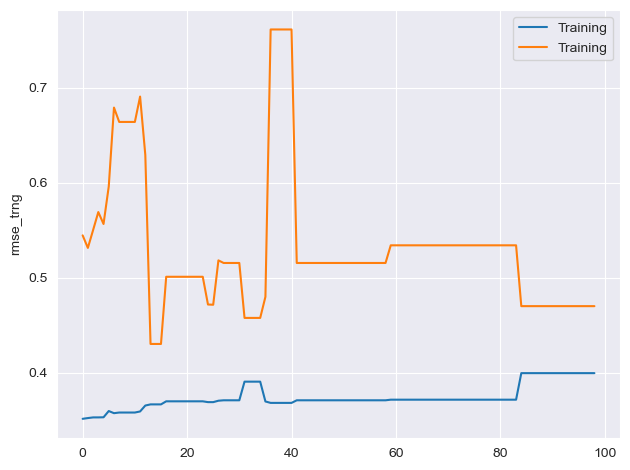

In [64]:
fig, ax = plt.subplots()
sns.lineplot(data=df, y='rmse_trng', x=df.index, label='Training',ax=ax)
sns.lineplot(data=df, y='rmse_val', x=df.index, label='Training',ax=ax)
fig.tight_layout()


In [65]:
df[df['rmse_val'] == df['rmse_val'].min()]

,formula,rmse_trng,rmse_val
15,I(np.log(MedHouseVal)) ~ MedInc + HouseAge + A...,0.36655,0.43017


In [71]:
# instructor had 13 and 14
formula_minRMSE = form(13)

In [70]:
model_minRMSE = smf.ols(formula_minRMSE, Xy_train).fit()
model_minRMSE.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                 OLS                     Adj. R-squared:      0.583     
Dependent Variable:    I(np.log(MedHouseVal))  AIC:                 11508.0466
Date:                  2023-08-15 17:30        BIC:                 11673.8045
No. Observations:      13828                   Log-Likelihood:      -5732.0   
Df Model:              21                      F-statistic:         920.5     
Df Residuals:          13806                   Prob (F-statistic):  0.00      
R-squared:             0.583                   Scale:               0.13436   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -0.7440   0.0611 -12.1747 0.0000 -0.8637 -0.6242
MedInc                         0.4910   0.0095  51.5019 0.0000  0.4723  0.5096
HouseAge                      -0.0054   0.0021  -2.5992 0.0094 -0.0095 -0.0013
AveRooms                      -0.1538   0.0105 -14.6209 0.0000 -0.1744 -0.1332
AveBedrms                      0.3765   0.0558   6.7467 0.0000  0.2671  0.4859
Population                    -0.0001   0.0000  -1.6445 0.1001 -0.0002  0.0000
I(MedInc ** 2)                -0.0235   0.0006 -40.7441 0.0000 -0.0247 -0.0224
MedInc:AveRooms                0.0028   0.0013   2.1951 0.0282  0.0003  0.0054
MedInc:Population             -0.0000   0.0000  -1.3917 0.1640 -0.0000  0.0000
AveRooms:Population           -0.0001   0.0000 -11.7096 0.0000 -0.0001 -0.0001
MedInc:AveRooms:Population     0.0000   0.0000   5.8318 0.0000  0.0000  0.0000
I(HouseAge ** 2)               0.0001   0.0000   6.3101 0.0000  0.0001  0.0002
HouseAge:AveRooms              0.0000   0.0002   0.0786 0.9373 -0.0004  0.0004
HouseAge:AveBedrms             0.0069   0.0016   4.2930 0.0000  0.0037  0.0100
AveRooms:AveBedrms            -0.0640   0.0097  -6.5778 0.0000 -0.0830 -0.0449
HouseAge:AveRooms:AveBedrms   -0.0003   0.0000  -7.4945 0.0000 -0.0003 -0.0002
I(AveRooms ** 2)               0.0095   0.0011   8.9344 0.0000  0.0074  0.0115
AveBedrms:Population           0.0003   0.0000   8.2551 0.0000  0.0002  0.0004
AveRooms:AveBedrms:Population  0.0000   0.0000   0.0329 0.9738 -0.0000  0.0000
I(AveBedrms ** 2)              0.1261   0.0232   5.4389 0.0000  0.0807  0.1715
I(Population ** 2)             0.0000   0.0000   3.8642 0.0001  0.0000  0.0000
I(AveOccup ** 2)              -0.0000   0.0000  -5.7316 0.0000 -0.0000 -0.0000
------------------------------------------------------------------------------
Omnibus:                 467.326          Durbin-Watson:             2.007    
Prob(Omnibus):           0.000            Jarque-Bera (JB):          1194.686 
Skew:                    0.136            Prob(JB):                  0.000    
Kurtosis:                4.414            Condition No.:             368384174
==============================================================================
* The condition number is large (4e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

## Model Adequacy

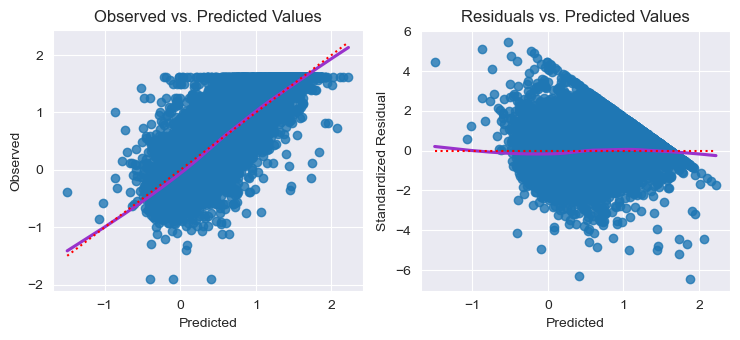

In [72]:
fig, ax = linearity_test(model_minRMSE, y_train['MedHouseVal'].apply(np.log))
fig.tight_layout()

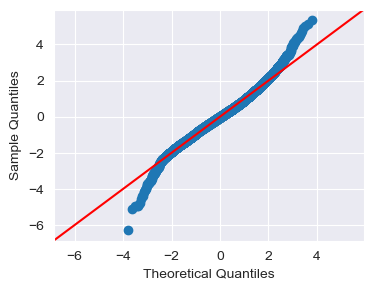

In [76]:
fig, ax = plt.subplots(figsize=(4,3))
smg.qqplot(model_minRMSE.resid, fit=True, line='45', ax=ax)
plt.show()

In [77]:
pred_trng = np.exp(model_minRMSE.fittedvalues)
rmse_trng = np.sqrt(mean_squared_error(y_train['MedHouseVal'], pred_trng))
rmse_trng

0.7585979685367816

In [79]:
pred_val = np.exp(model_minRMSE.predict(X_val))
rmse_val = np.sqrt(mean_squared_error(y_val['MedHouseVal'], pred_val))
print(rmse_val)

0.7631055909522774


In [81]:
pred_test = np.exp(model_minRMSE.predict(X_test))
rmse_test = np.sqrt(mean_squared_error(y_test['MedHouseVal'], pred_test))
print(rmse_test)

0.8231617368849486


Text(0, 0.5, 'Observed Median House Value')

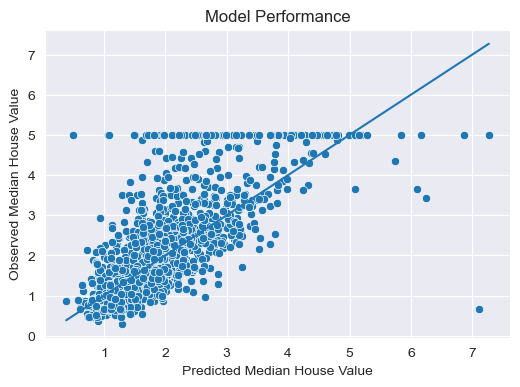

In [82]:
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x=pred_test, y=y_test['MedHouseVal'], ax=ax)
sns.lineplot(x=pred_test, y=pred_test)
ax.set_title('Model Performance')
ax.set_xlabel('Predicted Median House Value')
ax.set_ylabel('Observed Median House Value')

In [84]:
X_test[(pred_test > 7) & (y_test['MedHouseVal']<5)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
4548,7.5752,52.0,3.142857,1.0,55.0,7.857143


In [85]:
55 / 7.857143

6.999999872727275

In [86]:
pred_test[4548]

7.115723753363239

In [87]:
y_test.loc[4548]

MedHouseVal    0.675
Name: 4548, dtype: float64